In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tifffile

def sample_and_display_tiffs(directory_path, sample_size=100, grid_size=(10, 10), bands=(0, 1, 2)):
    """
    Randomly samples TIFF images from a directory and displays them in a grid.
    
    Parameters:
    -----------
    directory_path : str
        Path to the directory containing TIFF images
    sample_size : int
        Number of images to sample (default: 100)
    grid_size : tuple
        Size of the grid for display (default: 10x10)
    bands : tuple
        Which bands to use for RGB display (default: 0,1,2)
    """
    # Get all TIFF files in the directory
    tiff_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.tif', '.tiff'))]
    
    if len(tiff_files) < sample_size:
        print(f"Warning: Only {len(tiff_files)} TIFF files found. Using all available files.")
        sample_size = len(tiff_files)
    
    # Randomly sample files
    sampled_files = random.sample(tiff_files, sample_size)
    
    # Create figure for display with no space between images
    rows, cols = grid_size
    fig = plt.figure(figsize=(20, 20))
    gs = GridSpec(rows, cols, figure=fig, wspace=0, hspace=0)
    
    # Process each sampled file
    for i, file_name in enumerate(sampled_files):
        if i >= rows * cols:
            break
            
        # Read the TIFF file
        file_path = os.path.join(directory_path, file_name)
        try:
            img = tifffile.imread(file_path)
            
            # Check if this is a 4-band image
            if img.ndim < 3 or img.shape[2] < 4:
                print(f"Skipping {file_name}: Not a 4-band image")
                continue
                
            # Normalize each band to 0-1 range for display
            r, g, b = bands  # Use specified bands for RGB display
            rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.float32)
            
            for j, band in enumerate([r, g, b]):
                band_data = img[:, :, band].astype(np.float32)
                if band_data.max() > 0:  # Avoid division by zero
                    band_data = (band_data - band_data.min()) / (band_data.max() - band_data.min())
                rgb[:, :, j] = band_data
            
            # Create subplot with no borders
            row, col = i // cols, i % cols
            ax = fig.add_subplot(gs[row, col])
            ax.imshow(rgb, aspect='auto', interpolation='none')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            
            # Remove title to maximize image space
            # ax.set_title(f"{i+1}", fontsize=8)
            
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    
    # Remove the suptitle to maximize space for images
    # plt.suptitle(f"Random Sample of {sample_size} TIFF Images", fontsize=16)
    # No tight_layout to ensure images touch borders
    plt.show()
    
    return fig


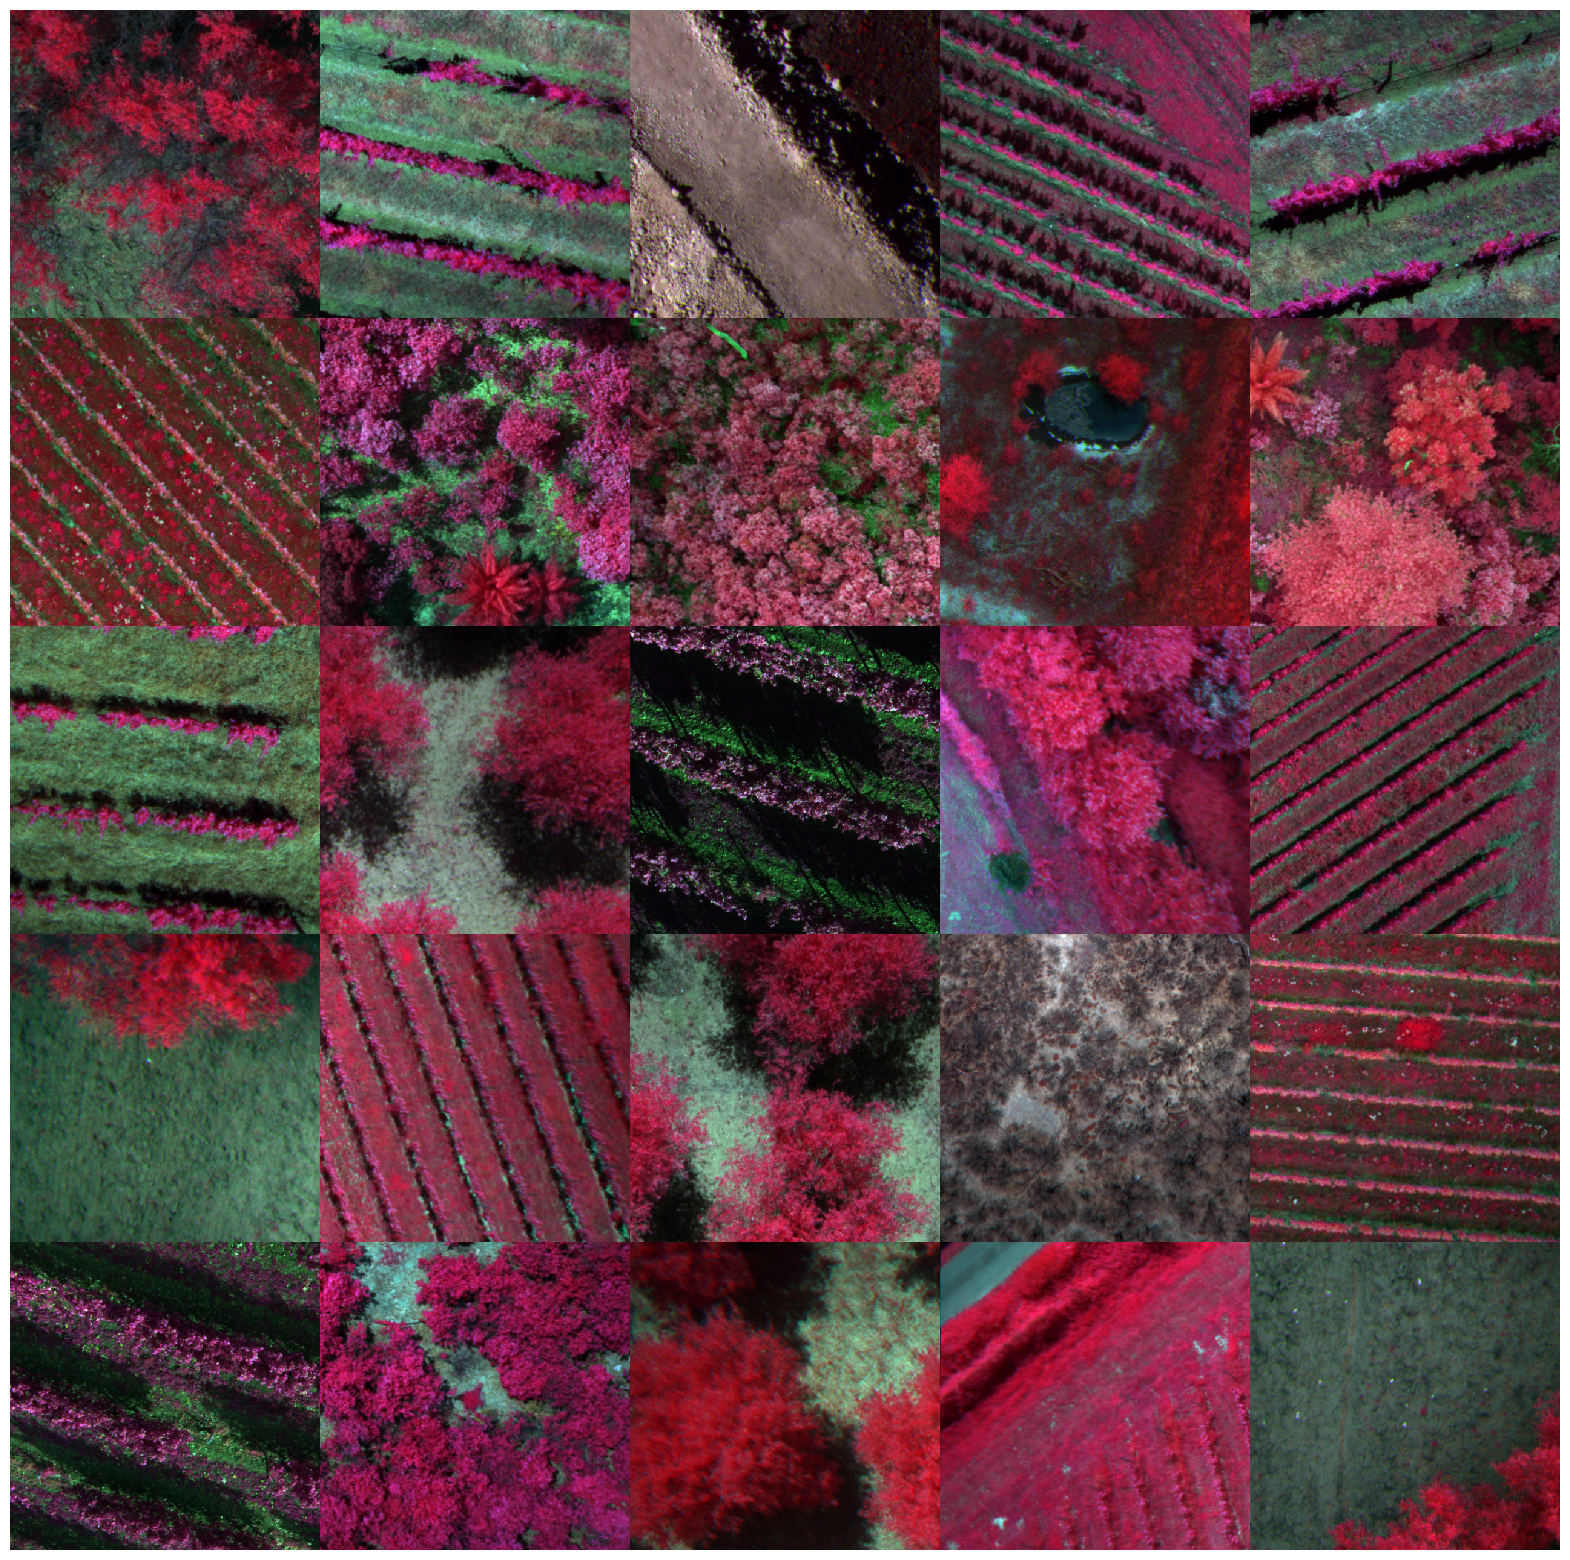

In [7]:

# Example usage

fig = sample_and_display_tiffs(
    "../../msdata/data/chipped_512", 
    sample_size=25, 
    grid_size=(5, 5),
    bands=[3,1,0]
    
)

fig.savefig("100grid.png", dpi=300, bbox_inches='tight')
